In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import re

In [ ]:
purchase_filepath = pd.read_csv('QVI_purchase_behaviour.csv')
transaction_filepath = pd.read_csv('QVI_transaction_data.csv')
purchase_data = pd.DataFrame(purchase_filepath)
transaction_data = pd.DataFrame(transaction_filepath)

In [ ]:
#look at the purchase dataset/dataframe
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# look at the transaction dataframe/dataset
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# look at the data types in purchase dataset
purchase_data.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [ ]:
# look at the data types in transaction dataset
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

notice that the data type of the 'DATE' is not in date format 

In [ ]:
# change the format into date
DATE_formatted = pd.to_datetime(transaction_data['DATE'],origin = pd.Timestamp('1899-12-30'), unit = 'D')
transaction_data['DATE'] = DATE_formatted
transaction_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [ ]:
#checking the dataframe
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
#checking the length of the data based on product name column
len(transaction_data['PROD_NAME'])

264836

In [ ]:
# check the number of products sold
len(transaction_data['PROD_NAME'].unique())

114

In [ ]:
# look at all the product names sold

pd.set_option('display.max_rows', None) #so all the product names are displayed
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Notice that not all the products are chips, since i am not sure which are chips, **let's say those that have salsa word in it are not chips**

In [ ]:
# create a function to remove digits and special characters
def deletespecialcharacter(input_list):
  new_list = []
  for word in input_list:
    new_word = ' '.join(s for s in word.split() if any(c.isalpha() for c in s))
    new_word  = re.sub(r'\S*\d\S*', '', new_word)
    new_list.append(new_word)
  
  return new_list

In [ ]:
# get the product names only
product_names_only = transaction_data['PROD_NAME'].copy()
product_names_only = pd.DataFrame(deletespecialcharacter(product_names_only), columns = ['PROD_NAMES_ONLY'])
product_names_only.head()

,PROD_NAMES_ONLY
0,Natural Chip Compny
1,CCs Nacho Cheese
2,Smiths Crinkle Cut Chips Chicken
3,Smiths Chip Thinly S/Cream&Onion
4,Kettle Tortilla ChpsHny&Jlpno Chili


In [ ]:
# make sure it has the same length
len(product_names_only)

264836

It is important to know **the best selling products** are, based on the frequency of the occurance

In [ ]:
# know the frequency of occurance on each product
product_names_only['PROD_NAMES_ONLY'].value_counts()

Kettle Mozzarella Basil Pesto           3304
Kettle Tortilla ChpsHny&Jlpno Chili     3296
Cobs Popd Swt/Chlli &Sr/Cream Chips     3269
Tyrrells Crisps Ched Chives             3268
Cobs Popd Sea Salt Chips                3265
Kettle  Swt Pot Sea Salt                3257
Tostitos Splash Of Lime                 3252
Infuzions Thai SweetChili PotatoMix     3242
Smiths Crnkle Chip Orgnl Big Bag        3233
Thins Potato Chips Hot Spicy            3229
Kettle Sensations Camembert Fig         3219
Doritos Corn Chips Cheese Supreme       3217
Pringles Barbeque                       3210
Doritos Corn Chip Mexican Jalapeno      3204
Kettle Sweet Chilli And Sour Cream      3200
Smiths Crinkle Chips Salt Vinegar       3197
Thins Chips Light& Tangy                3188
Dorito Corn Chp Supreme                 3185
Pringles Sweet&Spcy BBQ                 3177
Tyrrells Crisps Lightly Salted          3174
Infuzions BBQ Rib Prawn Crackers        3174
Kettle Sea Salt And Vinegar             3173
Doritos Co

In [ ]:
# check again, to make sure
product_names_only['PROD_NAMES_ONLY'].value_counts().sum()

264836

it has the same length as the dataset, we can see clearly the best selling produts are. Below is the bar plot to make it easier.

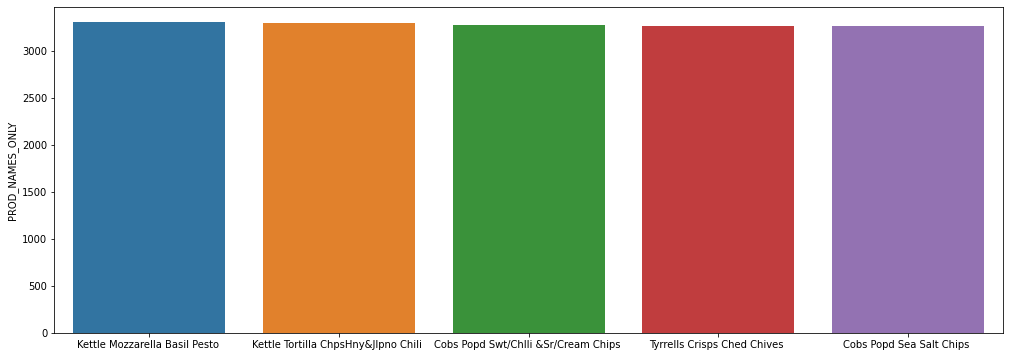

In [ ]:
# make the barplot
fig , ax = plt.subplots()
fig.set_size_inches(17, 6)
ax = sns.barplot(x= product_names_only['PROD_NAMES_ONLY'].value_counts().head(5).index, y= product_names_only['PROD_NAMES_ONLY'].value_counts().head(5))

The bar plot shows the top 5 products that were sold for a year. But considering that there is still 'not chips' product this is not what we want

In [ ]:
# remove the transactions of salsa products from the dataset/dataframe
transaction_data = transaction_data[transaction_data['PROD_NAME'].str.contains("Salsa") == False]
len(transaction_data)

246742

Already remove the entry/transaction of 'Salsa' products from the dataset. Check the occurancea and top selling products.

In [ ]:
transaction_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Tyrrells Crisps     

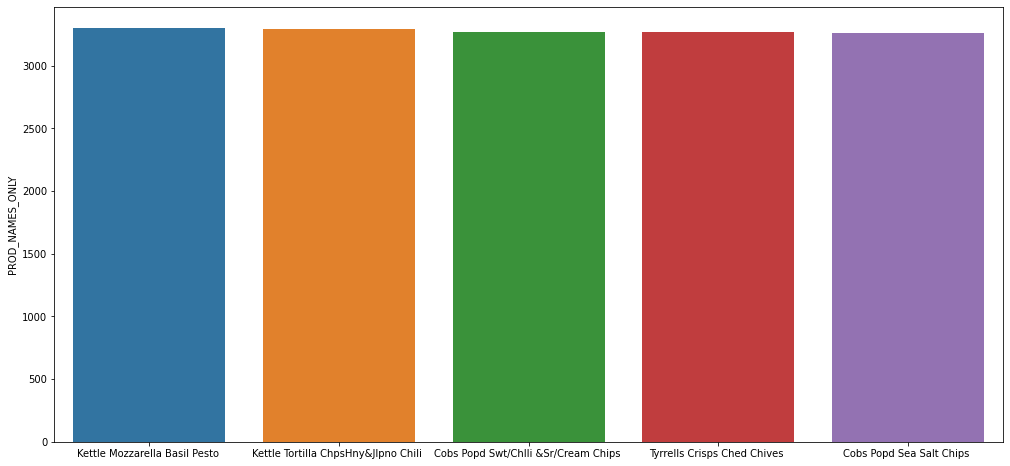

In [ ]:
# bab plot for the chips products
chips_prod = product_names_only[product_names_only['PROD_NAMES_ONLY'].str.contains("Salsa") == False]

fig2 , ax2 = plt.subplots()
fig2.set_size_inches(17, 8)
ax2 = sns.barplot(x= chips_prod['PROD_NAMES_ONLY'].value_counts().head(5).index, y= chips_prod['PROD_NAMES_ONLY'].value_counts().head(5))


In [ ]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# to create clean dataset no "Salsa" product and now digits and special characters
transaction_data_clean = transaction_data.copy()
transaction_data_clean['PROD_NAME_ONLY'] = deletespecialcharacter(transaction_data_clean['PROD_NAME'])
transaction_data_clean = transaction_data_clean[transaction_data_clean['PROD_NAME_ONLY'].str.contains("Salsa") == False]
transaction_data_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ONLY
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili


In [ ]:
transaction_data_clean.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


After cleaning the dataset from "salsa" products, we can see that statistics calsulation there is an outlier from thee 'PROD_QTY' where there is a customer that purchased way more than average/quartile of the dataset. **Need to remove this outlier to create better analysis.**

In [ ]:
# checking the outlier from the clean dataset
transaction_data_clean[transaction_data_clean['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ONLY
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme


The customer did 2 transactions with the same amount of product quantity.

In [ ]:
# remove the 200 outlier
transaction_data_clean.drop(transaction_data_clean[transaction_data_clean['PROD_QTY'] == 200].index, inplace= True)
transaction_data_clean[transaction_data_clean['PROD_QTY'] == 200] # check

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ONLY


None.

In [ ]:
# checking the outliers
transaction_data_clean.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [ ]:
# checking null values
transaction_data_clean.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PROD_NAME_ONLY    0
dtype: int64

**No Null Values** in each column

In [ ]:
# checking the transactions based on loyalty card
transaction_data_clean['LYLTY_CARD_NBR'].value_counts().head(20)

230078    17
162039    17
105026    16
116181    16
179228    16
128178    16
113080    16
23192     16
172032    16
138016    15
222242    15
104117    15
30162     15
213140    15
94185     15
152054    15
156240    15
109036    15
259100    15
112231    15
Name: LYLTY_CARD_NBR, dtype: int64

Above are the top 20 customers transactions based on their transactions and lloyalty card.

In [ ]:
labels = transaction_data_clean['LYLTY_CARD_NBR'].value_counts().unique()
amounts = transaction_data_clean['LYLTY_CARD_NBR'].value_counts().value_counts().sort_values(ascending = True)

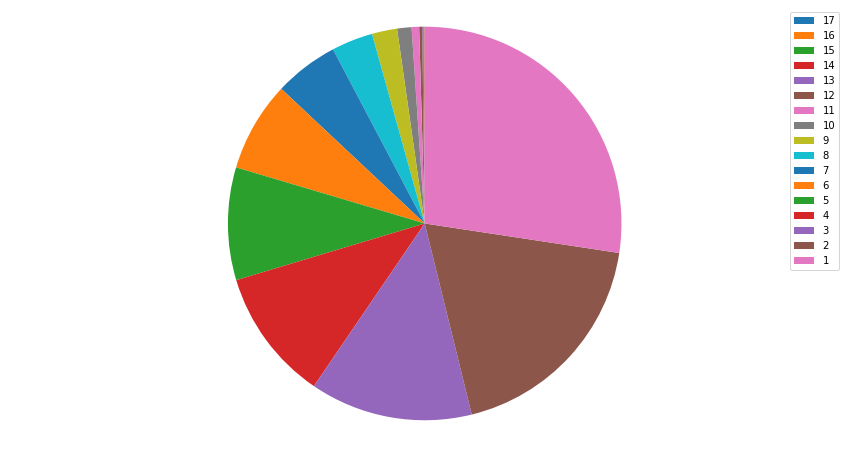

In [ ]:
# looking at the amount each purchases

fig3 , ax3 = plt.subplots()
fig3.set_size_inches(15, 8)
ax3.pie(amounts,shadow=False, startangle=90)
ax3.axis('equal') #to ensure the pie drawn in a circle
ax3.legend(labels)


Most of the customers buy one product per transaction

In [ ]:
# filter by date
len(transaction_data_clean['DATE'].unique())

364

there is 364 date of transactions, that means missing one day in a year.

In [ ]:
# checking the amount of transactions in a day
transaction_data_clean['DATE'].value_counts().head(10)

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
2018-12-18    799
2018-12-21    781
2019-06-07    762
2018-09-06    745
2019-06-14    743
Name: DATE, dtype: int64

From that we can assume that **highest transactions were in december** near christmat/new year

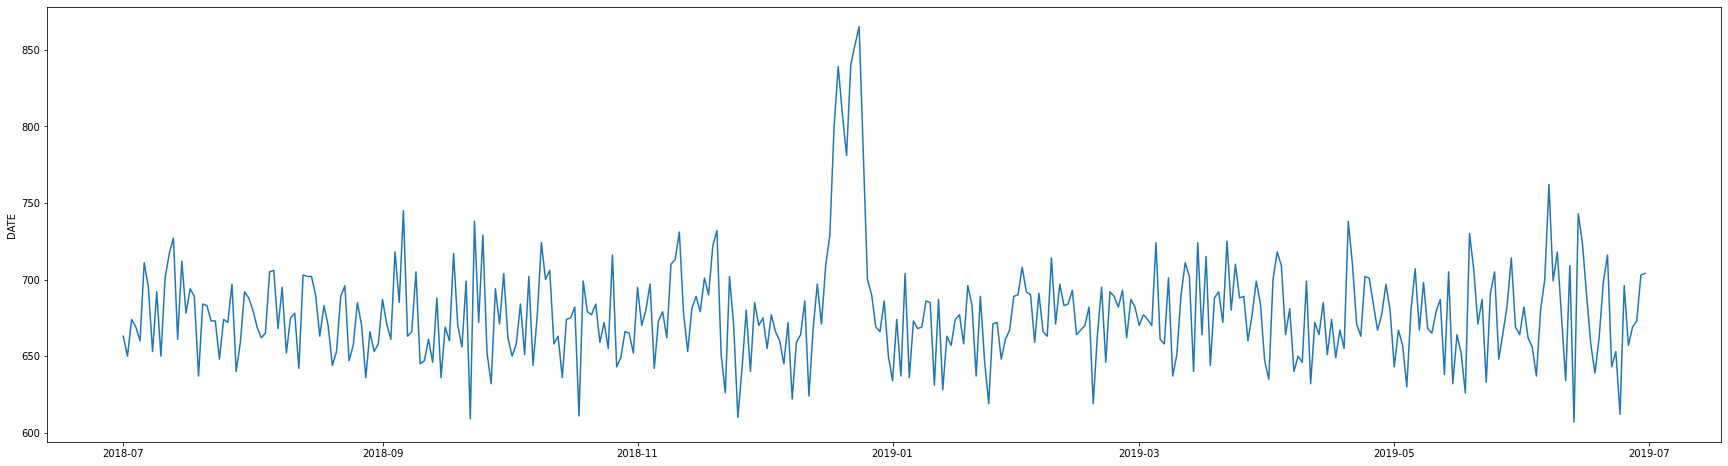

In [ ]:
# create the line plot for a year
fig4 , ax4 = plt.subplots()
fig4.set_size_inches(30, 8)
ax4 = sns.lineplot(x = transaction_data_clean['DATE'].value_counts().index, y = transaction_data_clean['DATE'].value_counts())

Notice the **significant spike** around december indicating high transactions

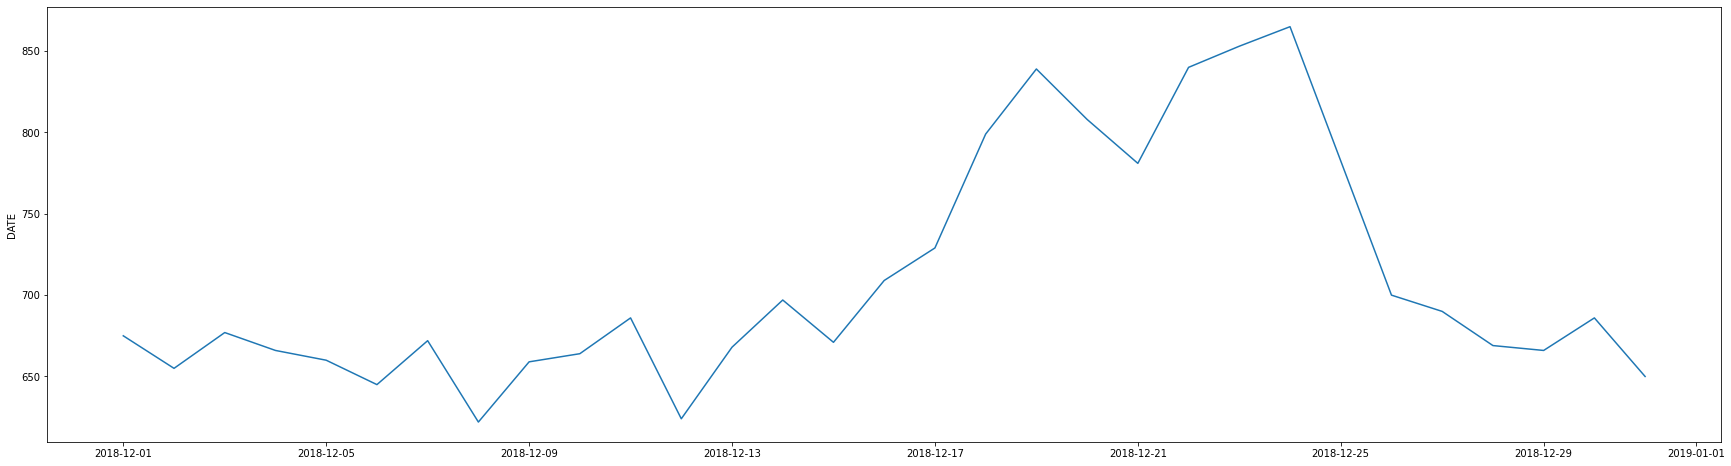

In [ ]:
# line plot in december
december_date = pd.DataFrame(transaction_data_clean[transaction_data_clean['DATE'] >= '2018-12-01'], columns = ["DATE"])
december_date = december_date[(december_date['DATE'] <= '2018-12-31')]

fig5 , ax5 = plt.subplots()
fig5.set_size_inches(30, 8)
ax5 = sns.lineplot(x = december_date['DATE'].value_counts().index, y = december_date['DATE'].value_counts())

This proves that the peak of transactions in december are around the christmas and new year

In [ ]:
# function to remove string except for digits
def deleteallexceptdigit(input_list):
  new_list = []
  for word in list(input_list):
    new_word = ''.join(c for c in word if c.isdigit())
    # new_word = (re.findall(r"\d+", word))
    new_list.append(new_word)
  
  return new_list

In [ ]:
prod_name = transaction_data_clean['PROD_NAME']
prod_name = deleteallexceptdigit(prod_name)
transaction_data_clean['PACK_SIZE'] = prod_name

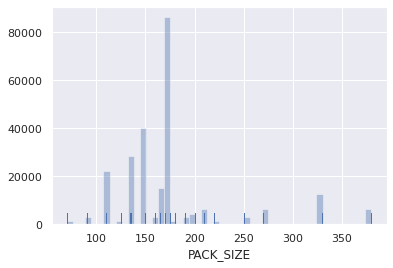

In [ ]:
# histogram of pack size
sns.set(color_codes=True)
sns.distplot(transaction_data_clean['PACK_SIZE'], kde = False, rug = True)

Most of the distribution of pack sizes are in 150g to 175g

In [ ]:
transaction_data_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ONLY,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150


In [ ]:
# function for getting first word
def getfirstword(input_list):
  new_list = []
  for word in list(input_list):
    new_word = word.split()[0]
    new_list.append(new_word)
  
  return new_list

In [ ]:
# look for brand names from the first name  of the product names
transaction_data_clean['BRAND_NAME'] = getfirstword(transaction_data_clean['PROD_NAME'])
transaction_data_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ONLY,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150,Kettle


In [ ]:
# get brand names
brand_names = transaction_data_clean['BRAND_NAME'].copy()
brand_names.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

There are brand names that are the same but written differently

1. Smiths = Smith
2. Doritos = Dorito
3. RRD = Red
4. Snbts = Sunbites
5. Natural = NCC
6. Infzns = Infuzions

In [ ]:
#rename the same brand
transaction_data_clean['BRAND_NAME'].replace({'Natural' : 'NCC','Dorito' : 'Doritos','Red' : 'RRD','Snbts':'Sunbites','Infzns' : 'Infuzions','Smith': 'Smiths'},inplace = True)
transaction_data_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ONLY,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150,Kettle


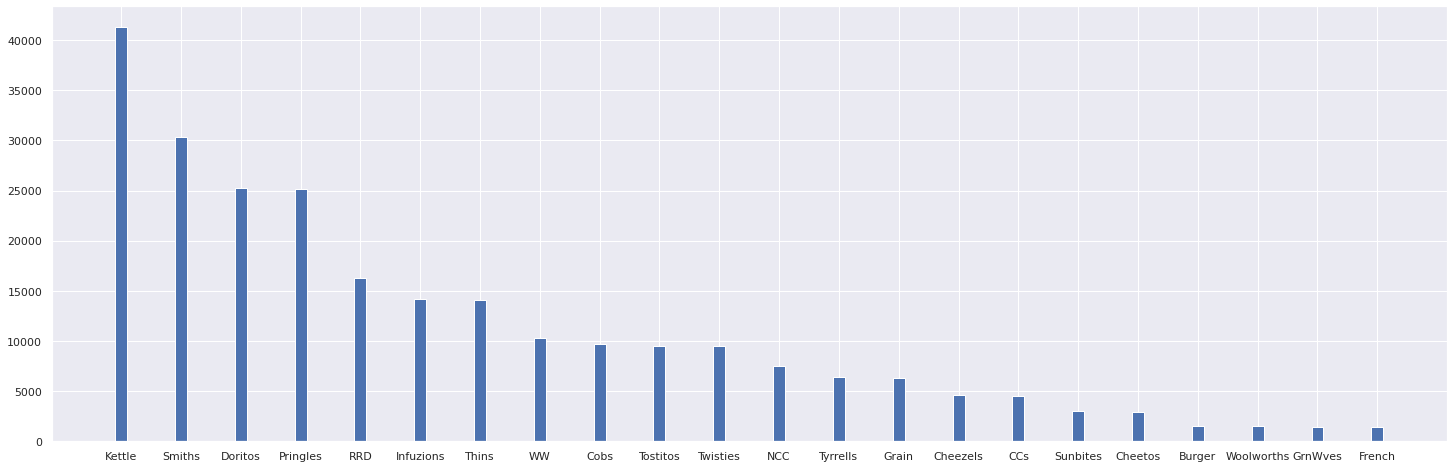

In [ ]:
fig9 , ax9 = plt.subplots()
fig9.set_size_inches(25, 8)
ax9 = plt.bar(transaction_data_clean['BRAND_NAME'].value_counts().index, transaction_data_clean['BRAND_NAME'].value_counts(), width = 0.2)

In [ ]:
transaction_data_clean.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PROD_NAME_ONLY    0
PACK_SIZE         0
BRAND_NAME        0
dtype: int64

Done adjusting and exploring the transaction data, and created the clean dataset

In [ ]:
# purchase data is the saame as customer data
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# do some basic summaries
#Loyalty card number
len(purchase_data['LYLTY_CARD_NBR'].unique())

72637

the total number of loyalty card member is **72637**

In [ ]:
# do some basic summaries
#lifestage
purchase_data['LIFESTAGE'].describe()

count        72637
unique           7
top       RETIREES
freq         14805
Name: LIFESTAGE, dtype: object

In [ ]:
purchase_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

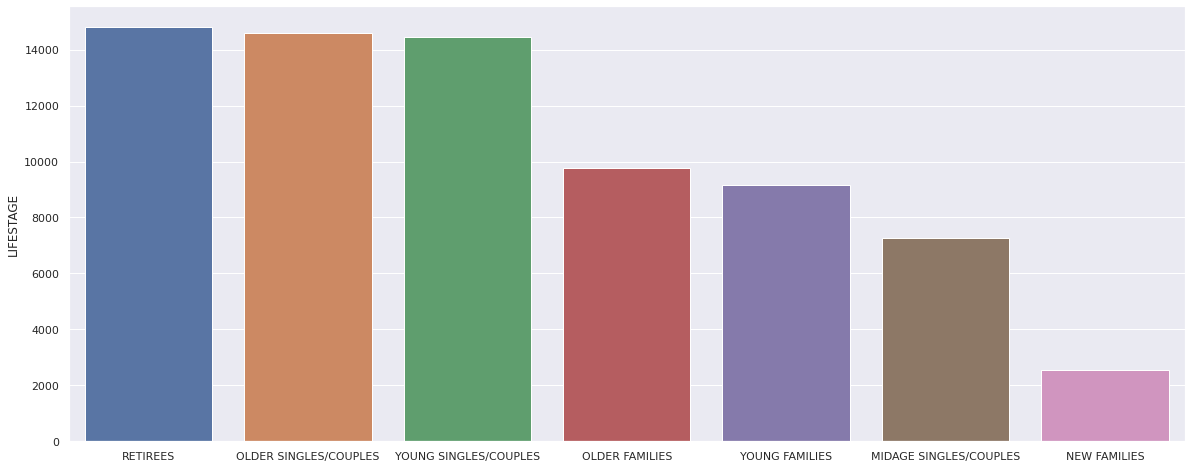

In [ ]:
fig6 , ax6 = plt.subplots()
fig6.set_size_inches(20, 8)
ax6 = sns.barplot(x= purchase_data['LIFESTAGE'].value_counts().index, y= purchase_data['LIFESTAGE'].value_counts())

there are **7 lifestage type customer** and the **top 3** are **retirees, older singles/couples, and young singles/couples**

In [ ]:
# do some basic summaries
# premium_customer
purchase_data['PREMIUM_CUSTOMER'].describe()

count          72637
unique             3
top       Mainstream
freq           29245
Name: PREMIUM_CUSTOMER, dtype: object

In [ ]:
purchase_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

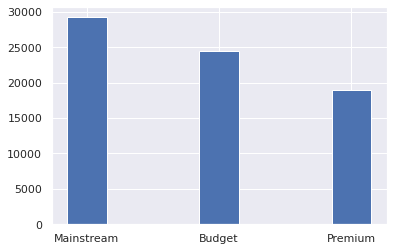

In [ ]:
fig7 , ax7 = plt.subplots()
fig7.set_size_inches(6, 4)
ax7 = plt.bar(purchase_data['PREMIUM_CUSTOMER'].value_counts().index, purchase_data['PREMIUM_CUSTOMER'].value_counts(), width = 0.3)

the highest of the member are **'Mainstream'** member followed by 'Budget' and 'Premium'

In [ ]:
# looking at the type of customer from the top life stage member
retirees_premium_cust = purchase_data[purchase_data['LIFESTAGE'] == 'RETIREES']['PREMIUM_CUSTOMER'].value_counts()
older_singlecouple_premium_cust = purchase_data[purchase_data['LIFESTAGE'] == 'OLDER SINGLES/COUPLES']['PREMIUM_CUSTOMER'].value_counts()
young_singlecouple_premium_cust = purchase_data[purchase_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']['PREMIUM_CUSTOMER'].value_counts()

In [ ]:
# making the bar chart labels
label = ['RETIREES', 'OLDER SINGLES/COUPLES', 'YOUNG SINGLES OR COUPLES']
Mainstream = [retirees_premium_cust[0],older_singlecouple_premium_cust[0],young_singlecouple_premium_cust[0]]
Budget = [retirees_premium_cust[1],older_singlecouple_premium_cust[1],young_singlecouple_premium_cust[1]]
Premium = [retirees_premium_cust[2],older_singlecouple_premium_cust[2],young_singlecouple_premium_cust[2]]

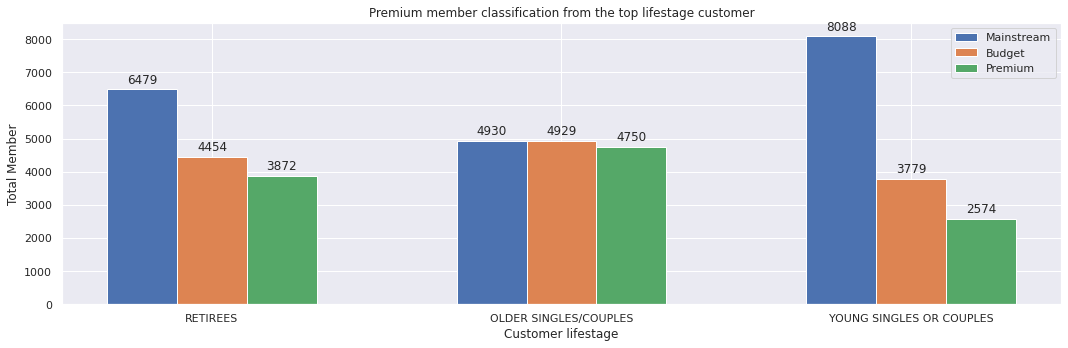

In [ ]:
# making the chart
x = np.arange(len(label))  # the label locations
width = 0.2  # the width of the bars

fig8 , ax8 = plt.subplots()
fig8.set_size_inches(15, 5)
rects1 = ax8.bar(x-width, Mainstream, width, label='Mainstream')
rects2 = ax8.bar(x, Budget, width, label='Budget')
rects3 = ax8.bar(x + width, Premium, width, label='Premium')

ax8.set_ylabel('Total Member')
ax8.set_xlabel('Customer lifestage')
ax8.set_title('Premium member classification from the top lifestage customer')
ax8.set_xticks(x)
ax8.set_xticklabels(label)
ax8.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax8.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig8.tight_layout()

plt.show()

Merging the transaction data and purchase data

In [ ]:
# make the duplicate of the dataset, don't really know why
transaction_data_clean_2 = transaction_data_clean.copy()
purchase_data_2 = purchase_data.copy()

In [ ]:
len(purchase_data_2['LYLTY_CARD_NBR'].unique())

72637

In [ ]:
len(transaction_data_clean_2['LYLTY_CARD_NBR'].unique())

71287

In [ ]:
len(purchase_data_2['LYLTY_CARD_NBR'].unique()) - len(transaction_data_clean_2['LYLTY_CARD_NBR'].unique())

1350

there are **1350** loyalty member registered customer **who didn't do any transactions**.

In [ ]:
# merge it according to the transactions made 
data = purchase_data_2.merge(transaction_data_clean_2, on='LYLTY_CARD_NBR', how='left', indicator=True)
data = data[data['_merge'] == 'both']
del data['_merge']
len(data['LYLTY_CARD_NBR'].unique())

71287

In [ ]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ONLY,PACK_SIZE,BRAND_NAME
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,Natural Chip Compny,175,NCC
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,Red Rock Deli Chikn&Garlic Aioli,150,RRD
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1.0,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,Grain Waves Sour Cream&Chives,210,Grain
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1.0,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,Natural ChipCo Hony Soy,175,NCC
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,WW Original Stacked Chips,160,WW


In [ ]:
data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PROD_NAME_ONLY      0
PACK_SIZE           0
BRAND_NAME          0
dtype: int64

In [ ]:
#save the datset into csv
from google.colab import drive
drive.mount('drive')

data.to_csv('QVI_data.csv')
!cp QVI_data.csv "drive/My Drive/"

Done merge the datasets

In [ ]:
# create metric
# segment purchase behaviuor by the lifestage
data['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     50793
RETIREES                  46431
OLDER FAMILIES            45158
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
Name: LIFESTAGE, dtype: int64

Above is the frequency of occurance based on the 'lifestage', means that the number of transaction for the past year according to the dataset **most done by OLDER SINGLES/COUPLES**

In [ ]:
# create metric
# segment purchase behaviuor by the premium_customer
data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    95043
Budget        86762
Premium       64935
Name: PREMIUM_CUSTOMER, dtype: int64

Most of the customers are **mainstream** member

In [ ]:
# looking at the premium member customer nased on the life stage in transaction
# premium customer in OLDER SINGLES/COUPLES
data[data['LIFESTAGE'] == 'OLDER SINGLES/COUPLES']['PREMIUM_CUSTOMER'].value_counts()

Budget        17172
Mainstream    17061
Premium       16560
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
# premium customer in retirees
data[data['LIFESTAGE'] == 'RETIREES']['PREMIUM_CUSTOMER'].value_counts()

Mainstream    19970
Budget        14225
Premium       12236
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
# premium customer in OLDER FAMILIES
data[data['LIFESTAGE'] == 'OLDER FAMILIES']['PREMIUM_CUSTOMER'].value_counts()

Budget        21514
Mainstream    13241
Premium       10403
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
# premium customer in YOUNG FAMILIES
data[data['LIFESTAGE'] == 'YOUNG FAMILIES']['PREMIUM_CUSTOMER'].value_counts()

Budget        17763
Mainstream    11947
Premium       10784
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
# premium customer in YOUNG SINGLES/COUPLES
data[data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']['PREMIUM_CUSTOMER'].value_counts()

Mainstream    19544
Budget         8573
Premium        5852
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
# premium customer in MIDAGE SINGLES/COUPLES
data[data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']['PREMIUM_CUSTOMER'].value_counts()

Mainstream    11095
Premium        7612
Budget         4691
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
# premium customer in NEW FAMILIES
data[data['LIFESTAGE'] == 'NEW FAMILIES']['PREMIUM_CUSTOMER'].value_counts()

Budget        2824
Mainstream    2185
Premium       1488
Name: PREMIUM_CUSTOMER, dtype: int64

Above are the metric for each lifestage category according to premium_customer

In [ ]:
# calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER
# life stage
label_premium_cust = list(data['PREMIUM_CUSTOMER'].unique())
label_lifestage = list(data['LIFESTAGE'].unique())

In [ ]:
# total sales based on lifestage
sales_lifestage = []
for ls in label_lifestage:
  total = data.loc[data['LIFESTAGE'] == ls, 'TOT_SALES'].sum()
  sales_lifestage.append(total)

sales_lifestage

[243756.6,
 294627.9,
 376019.64999999997,
 172523.8,
 47347.95,
 328519.9,
 342381.9]

In [ ]:
label_lifestage

['YOUNG SINGLES/COUPLES',
 'YOUNG FAMILIES',
 'OLDER SINGLES/COUPLES',
 'MIDAGE SINGLES/COUPLES',
 'NEW FAMILIES',
 'OLDER FAMILIES',
 'RETIREES']

In [ ]:
# total sales based on premium customer
sales_premium_customer = []
for ls in label_premium_cust:
  total = data.loc[data['PREMIUM_CUSTOMER'] == ls, 'TOT_SALES'].sum()
  sales_premium_customer.append(total)

sales_premium_customer

[472905.45, 700865.4, 631406.85]

In [ ]:
label_premium_cust

['Premium', 'Mainstream', 'Budget']

Text(0.5, 0, 'Customer Lifestage')

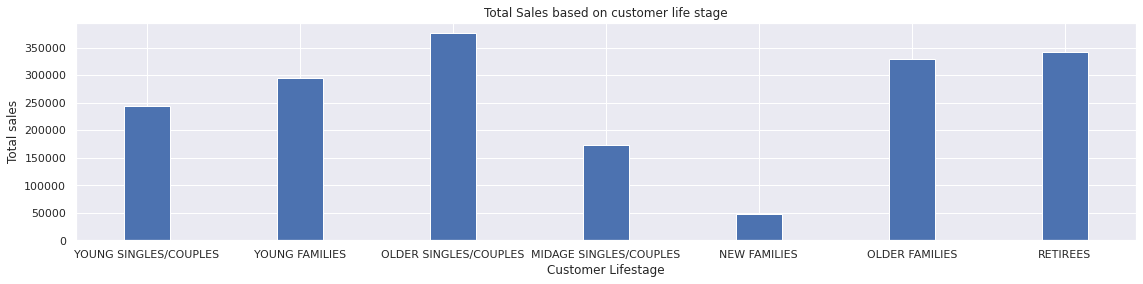

In [ ]:
# create bar life stage total sales

fig10, ax10 = plt.subplots()
fig10.set_size_inches(19, 4)
ax10.bar(label_lifestage, sales_lifestage, width = 0.3)
ax10.set_title('Total Sales based on customer life stage')
ax10.set_ylabel('Total sales')
ax10.set_xlabel('Customer Lifestage')

Text(0.5, 0, 'Premium customer member')

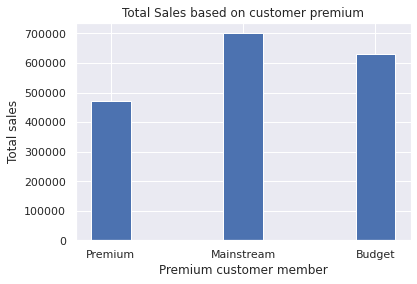

In [ ]:
# create bar premium customer total sales
fig11, ax11 = plt.subplots()
fig11.set_size_inches(6, 4)
ax11.bar(label_premium_cust, sales_premium_customer, width = 0.3)
ax11.set_title('Total Sales based on customer premium')
ax11.set_ylabel('Total sales')
ax11.set_xlabel('Premium customer member')

In [ ]:
label_pc = []
label_ls = []
total_ls_pc = []
for pc in label_premium_cust:
  for ls in label_lifestage:
    total = 0
    total = data[data['PREMIUM_CUSTOMER'] == pc]
    total = total[total['LIFESTAGE'] == ls]
    total = total['TOT_SALES'].sum()
    label_pc.append(pc)
    label_ls.append(ls)
    total_ls_pc.append(total)

In [ ]:
# lifestage and premium customer

data_ls_pc = pd.DataFrame({'PREMIUM_CUSTOMER' : label_pc,'LIFESTAGE':label_ls,'TOT_SALES':total_ls_pc})
data_ls_pc = data_ls_pc.pivot_table(index = 'PREMIUM_CUSTOMER', columns= 'LIFESTAGE')
data_ls_pc.reset_index(inplace= True)
data_ls_pc

PREMIUM_CUSTOMER  ...             TOT_SALES
LIFESTAGE                   ... YOUNG SINGLES/COUPLES
0                   Budget  ...               57122.1
1               Mainstream  ...              147582.2
2                  Premium  ...               39052.3

[3 rows x 8 columns]

[Text(0, 0, ''),
 Text(0, 0, 'Budget'),
 Text(0, 0, ''),
 Text(0, 0, 'Mainstream'),
 Text(0, 0, ''),
 Text(0, 0, 'Premium')]

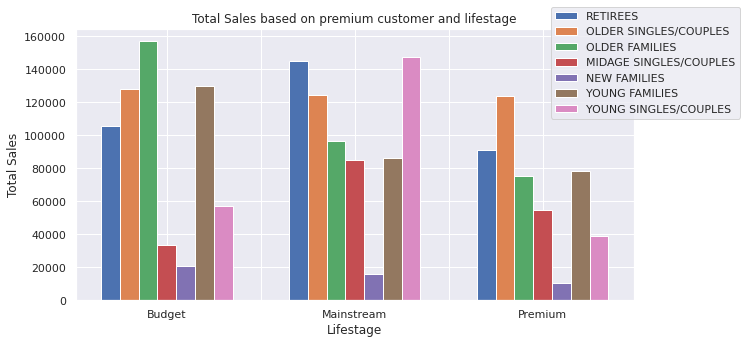

In [ ]:
# make chart bar

fig12, ax12 = plt.subplots()
fig12.set_size_inches(10, 5)

x = np.arange(0,len(data_ls_pc['PREMIUM_CUSTOMER']))

ax12.bar(x - 0.3, data_ls_pc['TOT_SALES']['RETIREES'], width=0.1, label = 'RETIREES')
ax12.bar(x - 0.2, data_ls_pc['TOT_SALES']['OLDER SINGLES/COUPLES'], width=0.1, label = 'OLDER SINGLES/COUPLES')
ax12.bar(x - 0.1, data_ls_pc['TOT_SALES']['OLDER FAMILIES'], width=0.1, label = 'OLDER FAMILIES')
ax12.bar(x, data_ls_pc['TOT_SALES']['MIDAGE SINGLES/COUPLES'], width=0.1, label = 'MIDAGE SINGLES/COUPLES')
ax12.bar(x + 0.1, data_ls_pc['TOT_SALES']['NEW FAMILIES'], width=0.1, label = 'NEW FAMILIES')
ax12.bar(x + 0.2, data_ls_pc['TOT_SALES']['YOUNG FAMILIES'], width=0.1, label = 'YOUNG FAMILIES')
ax12.bar(x + 0.3, data_ls_pc['TOT_SALES']['YOUNG SINGLES/COUPLES'], width=0.1, label = 'YOUNG SINGLES/COUPLES')

ticks = ['','Budget','','Mainstream','','Premium']

plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,1.1))

ax12.set_title('Total Sales based on premium customer and lifestage')
ax12.set_xlabel('Lifestage')
ax12.set_ylabel('Total Sales')
ax12.set_xticklabels(ticks)

This represents that Budget - Older Families, Mainstream - Young single/couples, and Mainstream - Retirees are major contributors to the sales.

In [ ]:
# get the average unit bought for rach premium customer and lifestage

label_pc = []
label_ls = []
avg_ls_pc = []
for pc in label_premium_cust:
  for ls in label_lifestage:
    avg = 0
    avg = data[data['PREMIUM_CUSTOMER'] == pc]
    avg = avg[avg['LIFESTAGE'] == ls]
    avg = avg['PROD_QTY'].mean()
    label_pc.append(pc)
    label_ls.append(ls)
    avg_ls_pc.append(avg)

dataavg_ls_pc = pd.DataFrame({'PREMIUM_CUSTOMER' : label_pc,'LIFESTAGE':label_ls,'AVG_SALES':avg_ls_pc})
dataavg_ls_pc = dataavg_ls_pc.pivot_table(index = 'PREMIUM_CUSTOMER', columns= 'LIFESTAGE')
dataavg_ls_pc.reset_index(inplace= True)
dataavg_ls_pc

PREMIUM_CUSTOMER  ...             AVG_SALES
LIFESTAGE                   ... YOUNG SINGLES/COUPLES
0                   Budget  ...              1.808002
1               Mainstream  ...              1.853510
2                  Premium  ...              1.807075

[3 rows x 8 columns]

[Text(0, 0, ''),
 Text(0, 0, 'Budget'),
 Text(0, 0, ''),
 Text(0, 0, 'Mainstream'),
 Text(0, 0, ''),
 Text(0, 0, 'Premium')]

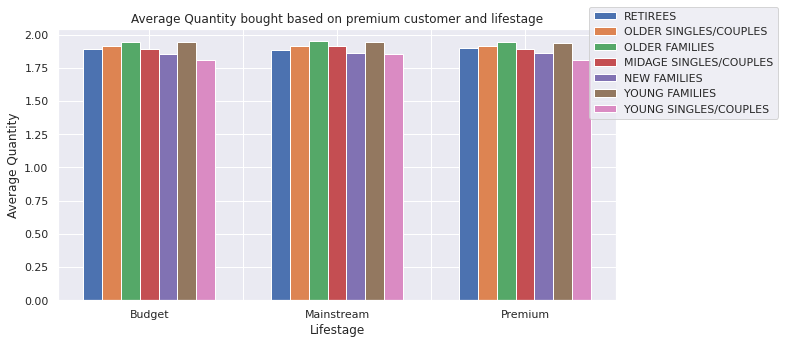

In [ ]:
# make chart bar

fig13, ax13 = plt.subplots()
fig13.set_size_inches(10, 5)

x = np.arange(0,len(dataavg_ls_pc['PREMIUM_CUSTOMER']))

ax13.bar(x - 0.3, dataavg_ls_pc['AVG_SALES']['RETIREES'], width=0.1, label = 'RETIREES')
ax13.bar(x - 0.2, dataavg_ls_pc['AVG_SALES']['OLDER SINGLES/COUPLES'], width=0.1, label = 'OLDER SINGLES/COUPLES')
ax13.bar(x - 0.1, dataavg_ls_pc['AVG_SALES']['OLDER FAMILIES'], width=0.1, label = 'OLDER FAMILIES')
ax13.bar(x, dataavg_ls_pc['AVG_SALES']['MIDAGE SINGLES/COUPLES'], width=0.1, label = 'MIDAGE SINGLES/COUPLES')
ax13.bar(x + 0.1, dataavg_ls_pc['AVG_SALES']['NEW FAMILIES'], width=0.1, label = 'NEW FAMILIES')
ax13.bar(x + 0.2, dataavg_ls_pc['AVG_SALES']['YOUNG FAMILIES'], width=0.1, label = 'YOUNG FAMILIES')
ax13.bar(x + 0.3, dataavg_ls_pc['AVG_SALES']['YOUNG SINGLES/COUPLES'], width=0.1, label = 'YOUNG SINGLES/COUPLES')

ticks = ['','Budget','','Mainstream','','Premium']

plt.legend(loc = 'upper right', bbox_to_anchor=(1.3,1.1))

ax13.set_title('Average Quantity bought based on premium customer and lifestage')
ax13.set_xlabel('Lifestage')
ax13.set_ylabel('Average Quantity')
ax13.set_xticklabels(ticks)

Pretty close comparison but young families and older families are the top 2

In [ ]:
label_pc = []
label_ls = []
avg_price_per_unit_ls_pc = []
for pc in label_premium_cust:
  for ls in label_lifestage:
    price_per_unit = 0
    price_per_unit = data[data['PREMIUM_CUSTOMER'] == pc]
    price_per_unit = price_per_unit[price_per_unit['LIFESTAGE'] == ls]
    price_per_unit = (price_per_unit['TOT_SALES'] / price_per_unit['PROD_QTY']).mean()
    label_pc.append(pc)
    label_ls.append(ls)
    avg_price_per_unit_ls_pc.append(price_per_unit)

dataavg_priceperunit_ls_pc = pd.DataFrame({'PREMIUM_CUSTOMER' : label_pc,'LIFESTAGE':label_ls,'AVG_SALES_PRICE_PER_UNIT':avg_price_per_unit_ls_pc})
dataavg_priceperunit_ls_pc = dataavg_priceperunit_ls_pc.pivot_table(index = 'PREMIUM_CUSTOMER', columns= 'LIFESTAGE')
dataavg_priceperunit_ls_pc.reset_index(inplace= True)
dataavg_priceperunit_ls_pc

PREMIUM_CUSTOMER  ... AVG_SALES_PRICE_PER_UNIT
LIFESTAGE                   ...    YOUNG SINGLES/COUPLES
0                   Budget  ...                 3.657366
1               Mainstream  ...                 4.065642
2                  Premium  ...                 3.665414

[3 rows x 8 columns]

[Text(0, 0, ''),
 Text(0, 0, 'Budget'),
 Text(0, 0, ''),
 Text(0, 0, 'Mainstream'),
 Text(0, 0, ''),
 Text(0, 0, 'Premium')]

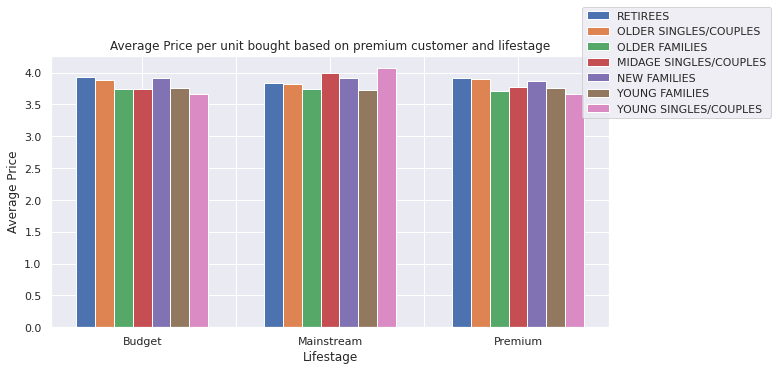

In [ ]:
# make chart bar

fig14, ax14 = plt.subplots()
fig14.set_size_inches(10, 5)

x = np.arange(0,len(dataavg_priceperunit_ls_pc['PREMIUM_CUSTOMER']))

ax14.bar(x - 0.3, dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['RETIREES'], width=0.1, label = 'RETIREES')
ax14.bar(x - 0.2, dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['OLDER SINGLES/COUPLES'], width=0.1, label = 'OLDER SINGLES/COUPLES')
ax14.bar(x - 0.1, dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['OLDER FAMILIES'], width=0.1, label = 'OLDER FAMILIES')
ax14.bar(x, dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['MIDAGE SINGLES/COUPLES'], width=0.1, label = 'MIDAGE SINGLES/COUPLES')
ax14.bar(x + 0.1, dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['NEW FAMILIES'], width=0.1, label = 'NEW FAMILIES')
ax14.bar(x + 0.2, dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['YOUNG FAMILIES'], width=0.1, label = 'YOUNG FAMILIES')
ax14.bar(x + 0.3, dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['YOUNG SINGLES/COUPLES'], width=0.1, label = 'YOUNG SINGLES/COUPLES')

ticks = ['','Budget','','Mainstream','','Premium']

plt.legend(loc = 'upper right', bbox_to_anchor=(1.3,1.2))

ax14.set_title('Average Price per unit bought based on premium customer and lifestage')
ax14.set_xlabel('Lifestage')
ax14.set_ylabel('Average Price')
ax14.set_xticklabels(ticks)

From the chart we can see that customers who are willing to buy more expensive chips

**from budget** :
top 2 are retirees and new families

**from mainstream** :
top 2 are young and midage singles/couples

**from premium** :
top 2 are retirees and older single/couples

In [ ]:
# find the difference of price per unit
difference_price_per_unit = [j-i for i, j in zip(avg_price_per_unit_ls_pc[:-1], avg_price_per_unit_ls_pc[1:])]
sum(difference_price_per_unit)/len(difference_price_per_unit)

0.012949534204582048

the average difference is not big

In [ ]:
# the difference of young and midage singles and couples accross each lifestage
difference_youngsinglescouples = [j-i for i, j in zip(dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['YOUNG SINGLES/COUPLES'][:-1], dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['YOUNG SINGLES/COUPLES'][1:])]
difference_youngsinglescouples

[0.4082754796050563, -0.40022809530976655]

In [ ]:
difference_midagesinglescouples = [j-i for i, j in zip(dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['MIDAGE SINGLES/COUPLES'][:-1], dataavg_priceperunit_ls_pc['AVG_SALES_PRICE_PER_UNIT']['MIDAGE SINGLES/COUPLES'][1:])]
difference_midagesinglescouples

[0.25091300025203234, -0.22354306617688557]

Tells that the difference of price per unit for  YOUNG AND MIDAEG SINGLES/COUPLES between lifestages are small and insignificant.

In [ ]:
data[['PREMIUM_CUSTOMER', 'PROD_NAME_ONLY']].head()

,PREMIUM_CUSTOMER,PROD_NAME_ONLY
0,Premium,Natural Chip Compny
1,Mainstream,Red Rock Deli Chikn&Garlic Aioli
2,Budget,Grain Waves Sour Cream&Chives
3,Budget,Natural ChipCo Hony Soy
4,Mainstream,WW Original Stacked Chips


In [ ]:
# look for the most bought chips brand for the highest price per unit customer --- Mainstream young singles and couples
youngcplsgl = data[data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES' ]
youngcplsgl['BRAND_NAME'].value_counts()

Kettle        5893
Smiths        3893
Pringles      3684
Doritos       3650
Infuzions     2013
RRD           2008
Thins         1959
Cobs          1396
Twisties      1395
Tostitos      1368
WW            1255
Tyrrells       955
NCC            927
Grain          913
Cheezels       614
CCs            594
Cheetos        364
Sunbites       361
French         194
Woolworths     192
Burger         178
GrnWves        163
Name: BRAND_NAME, dtype: int64

Chips with brand **'Kettle' are most bought** by young singles and couples

In [ ]:
# mainstream yougn single and couples
msyoungcplsgl = data[data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES' ]
msyoungcplsgl = msyoungcplsgl[msyoungcplsgl['PREMIUM_CUSTOMER'] == 'Mainstream']
msyoungcplsgl['BRAND_NAME'].value_counts()

Kettle        3844
Doritos       2379
Pringles      2315
Smiths        1921
Infuzions     1250
Thins         1166
Twisties       900
Tostitos       890
RRD            875
Cobs           864
Tyrrells       619
Grain          576
WW             423
NCC            394
Cheezels       346
CCs            222
Cheetos        166
Sunbites       128
French          78
GrnWves         70
Burger          62
Woolworths      56
Name: BRAND_NAME, dtype: int64

'Kettle still the most bought product' followed by 'Doritos' and 'Pringles'

In [ ]:
# change the data type of pack size
data['PACK_SIZE'] = data['PACK_SIZE'].astype(str).astype(int)

In [ ]:
# customer segment by pack size

label_pc = []
label_ls = []
avg_packsize_ls_pc = []
for pc in label_premium_cust:
  for ls in label_lifestage:
    avg = 0
    avg = data[data['PREMIUM_CUSTOMER'] == pc]
    avg = avg[avg['LIFESTAGE'] == ls]
    avg = avg['PACK_SIZE'].mean()
    label_pc.append(pc)
    label_ls.append(ls)
    avg_packsize_ls_pc.append(avg)

dataavg_packsize_ls_pc = pd.DataFrame({'PREMIUM_CUSTOMER' : label_pc,'LIFESTAGE':label_ls,'AVG_PACKSIZE':avg_packsize_ls_pc})
dataavg_packsize_ls_pc = dataavg_packsize_ls_pc.pivot_table(index = 'PREMIUM_CUSTOMER', columns= 'LIFESTAGE')
dataavg_packsize_ls_pc.reset_index(inplace= True)
dataavg_packsize_ls_pc

PREMIUM_CUSTOMER  ...          AVG_PACKSIZE
LIFESTAGE                   ... YOUNG SINGLES/COUPLES
0                   Budget  ...            173.378981
1               Mainstream  ...            178.344249
2                  Premium  ...            174.002563

[3 rows x 8 columns]

[Text(0, 0, ''),
 Text(0, 0, 'Budget'),
 Text(0, 0, ''),
 Text(0, 0, 'Mainstream'),
 Text(0, 0, ''),
 Text(0, 0, 'Premium')]

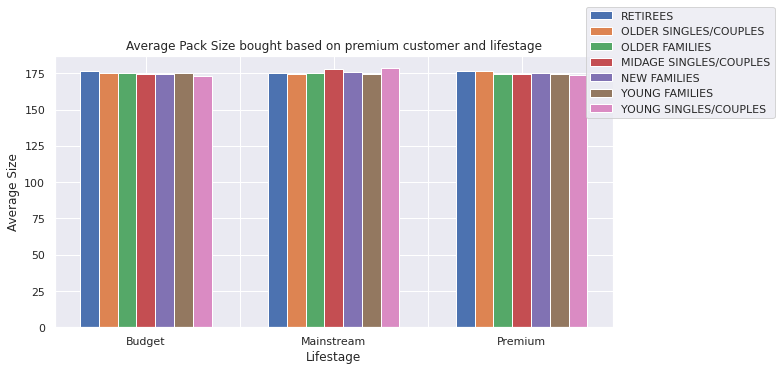

In [ ]:
# make chart bar

fig15, ax15 = plt.subplots()
fig15.set_size_inches(10, 5)

x = np.arange(0,len(dataavg_packsize_ls_pc['PREMIUM_CUSTOMER']))

ax15.bar(x - 0.3, dataavg_packsize_ls_pc['AVG_PACKSIZE']['RETIREES'], width=0.1, label = 'RETIREES')
ax15.bar(x - 0.2, dataavg_packsize_ls_pc['AVG_PACKSIZE']['OLDER SINGLES/COUPLES'], width=0.1, label = 'OLDER SINGLES/COUPLES')
ax15.bar(x - 0.1, dataavg_packsize_ls_pc['AVG_PACKSIZE']['OLDER FAMILIES'], width=0.1, label = 'OLDER FAMILIES')
ax15.bar(x, dataavg_packsize_ls_pc['AVG_PACKSIZE']['MIDAGE SINGLES/COUPLES'], width=0.1, label = 'MIDAGE SINGLES/COUPLES')
ax15.bar(x + 0.1, dataavg_packsize_ls_pc['AVG_PACKSIZE']['NEW FAMILIES'], width=0.1, label = 'NEW FAMILIES')
ax15.bar(x + 0.2, dataavg_packsize_ls_pc['AVG_PACKSIZE']['YOUNG FAMILIES'], width=0.1, label = 'YOUNG FAMILIES')
ax15.bar(x + 0.3, dataavg_packsize_ls_pc['AVG_PACKSIZE']['YOUNG SINGLES/COUPLES'], width=0.1, label = 'YOUNG SINGLES/COUPLES')

ticks = ['','Budget','','Mainstream','','Premium']

plt.legend(loc = 'upper right', bbox_to_anchor=(1.3,1.2))

ax15.set_title('Average Pack Size bought based on premium customer and lifestage')
ax15.set_xlabel('Lifestage')
ax15.set_ylabel('Average Size')
ax15.set_xticklabels(ticks)

For all customer segment in average bought 175g pack sized chips

In [ ]:
label_pc = []
label_ls = []
packsize_ls_pc = []
for pc in label_premium_cust:
  for ls in label_lifestage:
    size = []
    size = data[data['PREMIUM_CUSTOMER'] == pc]
    size = size[size['LIFESTAGE'] == ls]
    size = size['PACK_SIZE'].value_counts()
    label_pc.append(pc)
    label_ls.append(ls)
    packsize_ls_pc.append(size)

In [ ]:
for i in range(len(label_pc)):
  display(label_pc[i])
  display(label_ls[i])
  display(packsize_ls_pc[i])

'Premium'

'YOUNG SINGLES/COUPLES'

175    1618
150     933
134     537
110     499
170     452
165     373
330     247
380     146
200     144
210     139
270     138
160     112
90       97
190      89
135      70
250      57
220      57
70       50
180      48
125      46
Name: PACK_SIZE, dtype: int64

'Premium'

'YOUNG FAMILIES'

175    2998
150    1778
134    1007
110     947
170     850
165     713
330     503
380     265
210     245
270     242
200     225
190     158
90      146
135     144
250     132
160     131
220      83
180      80
70       71
125      66
Name: PACK_SIZE, dtype: int64

'Premium'

'OLDER SINGLES/COUPLES'

175    4458
150    2768
134    1744
110    1504
170    1324
165     918
330     902
210     449
380     445
270     434
200     270
250     223
135     218
190     190
160     183
90      171
125      95
220      89
180      88
70       87
Name: PACK_SIZE, dtype: int64

'Premium'

'MIDAGE SINGLES/COUPLES'

175    2082
150    1207
134     781
110     665
170     583
165     491
330     345
380     204
210     200
270     177
200     154
160     116
90      110
190      98
135      95
250      88
70       64
220      61
125      46
180      45
Name: PACK_SIZE, dtype: int64

'Premium'

'NEW FAMILIES'

175    376
150    233
134    165
110    148
170    113
165     89
330     78
210     54
380     38
200     35
270     30
190     23
250     21
125     18
90      16
160     15
135     14
220      8
180      7
70       7
Name: PACK_SIZE, dtype: int64

'Premium'

'OLDER FAMILIES'

175    2816
150    1673
134    1014
110     875
170     825
165     738
330     494
200     250
270     248
210     240
380     236
160     163
90      148
190     139
135     129
250     128
70       78
180      74
220      71
125      64
Name: PACK_SIZE, dtype: int64

'Premium'

'RETIREES'

175    3306
150    1943
134    1331
110    1193
170     959
165     700
330     635
380     369
270     340
210     315
250     182
200     177
135     176
90      132
160     112
190      92
125      72
70       71
220      68
180      63
Name: PACK_SIZE, dtype: int64

'Mainstream'

'YOUNG SINGLES/COUPLES'

175    4997
150    3080
134    2315
110    2051
170    1575
330    1195
165    1102
380     626
270     620
210     576
135     290
250     280
200     179
190     148
90      128
160     128
180      70
70       63
220      62
125      59
Name: PACK_SIZE, dtype: int64

'Mainstream'

'YOUNG FAMILIES'

175    3174
150    2004
134    1148
170    1016
110    1010
165     828
330     560
270     294
380     283
210     263
200     246
90      196
190     177
160     162
135     145
250     123
220      86
125      83
70       81
180      68
Name: PACK_SIZE, dtype: int64

'Mainstream'

'OLDER SINGLES/COUPLES'

175    4525
150    2773
134    1720
110    1557
170    1433
165    1061
330     805
380     455
210     424
270     411
200     330
135     279
190     226
250     223
90      222
160     212
125     111
70      101
180     100
220      93
Name: PACK_SIZE, dtype: int64

'Mainstream'

'MIDAGE SINGLES/COUPLES'

175    2975
150    1777
134    1159
110    1124
170     882
330     668
165     641
270     343
380     310
210     307
135     163
250     147
200     132
190     116
160     101
90       69
70       50
220      48
180      48
125      35
Name: PACK_SIZE, dtype: int64

'Mainstream'

'NEW FAMILIES'

175    589
150    374
134    224
110    214
170    169
165    126
330    103
380     65
210     61
270     60
135     39
200     30
250     24
190     23
160     23
125     15
90      15
220     14
180      9
70       8
Name: PACK_SIZE, dtype: int64

'Mainstream'

'OLDER FAMILIES'

175    3588
150    2189
134    1234
110    1131
170    1073
165     913
330     619
210     345
380     326
270     301
200     295
190     201
90      169
160     169
250     157
135     137
220     123
180      99
70       91
125      81
Name: PACK_SIZE, dtype: int64

'Mainstream'

'RETIREES'

175    5295
150    3290
134    2103
110    1829
170    1636
165    1182
330    1010
210     540
270     514
380     497
200     342
250     288
135     263
90      243
160     221
190     218
70      129
180     127
220     122
125     121
Name: PACK_SIZE, dtype: int64

'Budget'

'YOUNG SINGLES/COUPLES'

175    2338
150    1390
134     832
170     724
110     677
165     602
330     361
200     215
210     198
270     189
380     183
160     148
90      136
190     132
250     111
135      92
125      72
70       69
220      59
180      45
Name: PACK_SIZE, dtype: int64

'Budget'

'YOUNG FAMILIES'

175    4921
150    2862
134    1674
110    1488
170    1484
165    1166
330     892
210     440
380     431
270     410
200     369
90      254
190     242
160     228
135     212
250     211
180     125
220     124
70      122
125     108
Name: PACK_SIZE, dtype: int64

'Budget'

'OLDER SINGLES/COUPLES'

175    4625
150    2811
134    1843
110    1629
170    1321
165     983
330     892
380     456
210     438
270     436
200     277
135     243
250     222
90      191
160     188
190     183
70      120
220     110
180     104
125     100
Name: PACK_SIZE, dtype: int64

'Budget'

'MIDAGE SINGLES/COUPLES'

175    1277
150     771
134     449
110     434
170     370
165     316
330     207
270     129
380     114
210     106
200     102
160      73
90       70
190      52
135      51
250      47
220      43
70       27
125      27
180      26
Name: PACK_SIZE, dtype: int64

'Budget'

'NEW FAMILIES'

175    777
150    440
134    309
110    291
170    239
165    154
330    138
380     82
210     68
270     66
200     41
135     38
250     32
90      30
160     29
190     25
125     20
220     18
180     14
70      13
Name: PACK_SIZE, dtype: int64

'Budget'

'OLDER FAMILIES'

175    5808
150    3588
134    1996
110    1803
170    1786
165    1358
330    1092
270     532
380     510
210     505
200     448
190     312
160     306
90      305
250     278
135     268
180     166
220     159
125     152
70      142
Name: PACK_SIZE, dtype: int64

'Budget'

'RETIREES'

175    3847
150    2319
134    1517
110    1318
170    1169
165     843
330     794
380     375
270     371
210     359
200     212
250     195
135     191
90      160
190     151
160     150
220      66
70       63
125      63
180      62
Name: PACK_SIZE, dtype: int64

The list shows the detailed sizes for each customer segment

From the table we can conclude that the highest average chips size bought/ are from mainstream young and midage couples and single.
